In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Transforming all images into 48*48 grayscale images

root_dir = './../data/raw/ferplus_affectnet/'
desired_width = 48
desired_height = 48

for label in os.listdir(root_dir):
    label_dir = os.path.join(root_dir, label)
    
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        
        img = Image.open(img_path)
        
        # Converting image to grayscale if not already in grayscale
        if img.mode != 'L':
            img = img.convert('L')
        
        # Resizing image if it does not match desired size
        if img.size != (desired_width, desired_height):
            img = img.resize((desired_width, desired_height), Image.LANCZOS)
            
        img.save(img_path)
        
    print(f'{label} processed.')

anger processed.
contempt processed.
disgust processed.
fear processed.
happiness processed.
neutral processed.
sadness processed.
surprise processed.


In [3]:
# Splitting images into train/val/test folders

data_dir = './../data/raw/ferplus_affectnet/'
train_dir = './../data/cleaned/ferplus_affectnet/train/'
test_dir = './../data/cleaned/ferplus_affectnet/test/'

# Split ratios
train_ratio = 0.80

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    
    # Creating directories for each label
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)
    
    images = os.listdir(label_dir)

    # Shuffling images
    random.shuffle(images)

    # Calculating the split indices
    num_images = len(images)
    train_split_index = int(num_images * train_ratio)
    
    # Splitting images
    train_images = images[:train_split_index]
    test_images = images[train_split_index:]
    
    # Copying images to each directory
    for img in train_images:
        src = os.path.join(label_dir, img)
        dest = os.path.join(train_dir, label, img)
        shutil.copy(src, dest)
    
    for img in test_images:
        src = os.path.join(label_dir, img)
        dest = os.path.join(test_dir, label, img)
        shutil.copy(src, dest)
    
    print(f'{label} done.')
    
print('Data split completed.')

anger done.
contempt done.
disgust done.
fear done.
happiness done.
neutral done.
sadness done.
surprise done.
Data split completed.


In [15]:
def image_dataframe(data_dir):
    '''
    Iterates over an image folder in which each subfolders represents a label and creates a dataframe with file names and label.
    '''
    file_names = []
    labels = []

    # Iterating over subfolders
    for label_idx, label_folder in enumerate(sorted(os.listdir(data_dir))):
        label_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(label_path):
            # Iterating over files each subfolder
            for file_name in sorted(os.listdir(label_path)):
                file_names.append(file_name)
                labels.append(label_folder)

    # Creating df
    df = pd.DataFrame({'filename': file_names, 'label': labels})
    return df

In [16]:
# Creating train and test dfs with previous function

train_df = image_dataframe('./../data/cleaned/ferplus_affectnet/train/')
test_df = image_dataframe('./../data/cleaned/ferplus_affectnet/test/')

In [17]:
# Checking df shape

train_df.shape, test_df.shape

((37917, 2), (9484, 2))

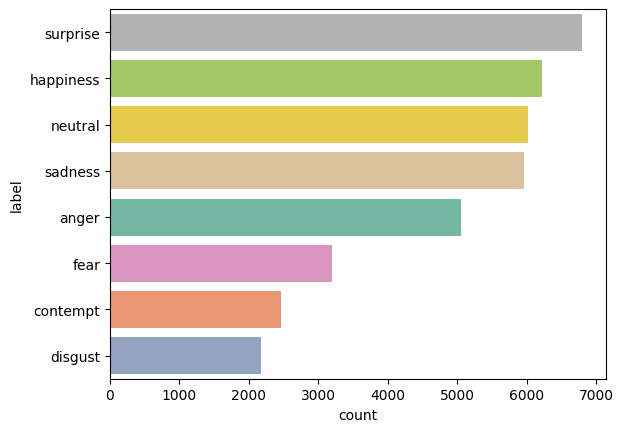

In [18]:
# Checking class distribution

counts = train_df['label'].value_counts().sort_values(ascending=False)

sns.countplot(y=train_df['label'], hue=train_df['label'], order=counts.index, palette='Set2')
plt.show()

In [19]:
# Function to plot random image from train dataframe

def plot_random_image_train(dataframe: pd.DataFrame=train_df):
    '''
    Plots a random image from a dataframe with image file names and labels.
    '''
    random_row = dataframe.sample(n=1).iloc[0]

    file_name = random_row['filename']
    label = random_row['label']

    data_dir = f'./../data/cleaned/ferplus_affectnet/train/{label}/'

    # Loading image
    image_path = os.path.join(data_dir, file_name)
    image = Image.open(image_path)

    # Plotting image
    plt.imshow(np.array(image), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

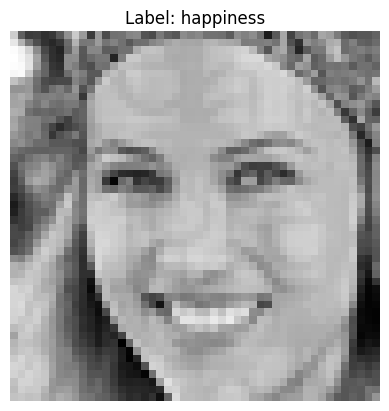

In [25]:
# Plotting random image with previous function

plot_random_image_train(train_df)

In [26]:
# Saving dfs as csv

train_df.to_csv('./../data/cleaned/train.csv', index=False)
test_df.to_csv('./../data/cleaned/test.csv', index=False)